In [4]:
%pip install pytorch-lightning
%pip install transformers
%pip install torch --no-cache-dir
%pip install torchvision


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached pytorch_lightning-1.6.1-py3-none-any.whl (582 kB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached pyDeprecate-0.3.2-py3-none-any.whl (10 kB)
  Using cached torch-1.11.0-cp37-cp37m-manylinux1_x86_64.whl (750.6 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached grpcio-1.44.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3

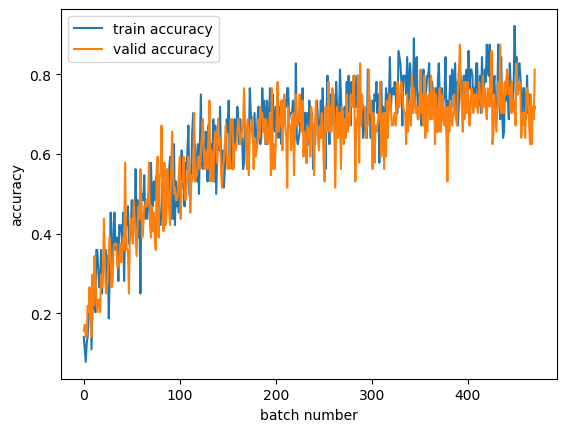

In [5]:
# check logs of model
# get logs from pkl file
import pickle
import matplotlib.pyplot as plt
import numpy as np
# load logs
N_COMPONENTS = "12x12"
with open('logs/train_logs_CIFAR10_model_{}.pkl'.format(N_COMPONENTS), 'rb') as f:
    train_logs = pickle.load(f)
with open('logs/val_logs_CIFAR10_model_{}.pkl'.format(N_COMPONENTS), 'rb') as f:
    valid_logs = pickle.load(f)
# plot logs
from logs_tests_utils import plot_logs
# plot_logs(train_logs, 'train')
# plot_logs(valid_logs, 'val')

from logs_tests_utils import compare_train_valid
compare_train_valid(train_logs, valid_logs)

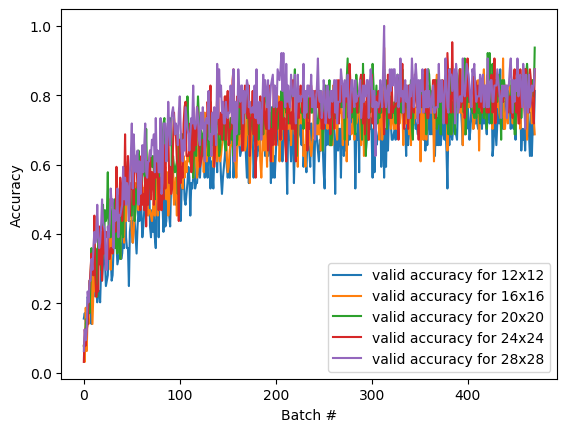

In [6]:
# now lets compare all the validation accuracies of each training log
# lets import all the logs
set_N_components = ["12x12", "16x16", "20x20", "24x24", "28x28"]
for N_COMPONENTS in set_N_components:
    with open('logs/val_logs_CIFAR10_model_{}.pkl'.format(N_COMPONENTS), 'rb') as f:
        valid_logs = pickle.load(f)
    valid_acc = []
    valid_loss = []
    for log in valid_logs:
        valid_acc.append(log["val_acc"])
        valid_loss.append(log["val_loss"])
    plt.plot(valid_acc, label = "valid accuracy for {}".format(N_COMPONENTS))
plt.legend()
plt.xlabel("Batch #")
plt.ylabel("Accuracy")
plt.show()
        

In [37]:
# load model using state dict
import sys, os
sys.path.append(os.path.abspath('..'))
from convolutional_nets import convnext_model
import torch
N_COMPONENTS = "28x28"
model = convnext_model(in_channels = 3, num_classes = 10, 
                        dropout = 0, learning_rate = 2e-4, image_size = 32)
model.load_state_dict(torch.load('CIFAR10_model{}.pt'.format(1)))

Some weights of the model checkpoint at facebook/convnext-tiny-224 were not used when initializing ConvNextModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing ConvNextModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ConvNextModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [35]:
import data
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
sys.path.append(os.path.abspath('..'))
from data_utils import CIFAR10_dataset
test_data = datasets.CIFAR10(
    root = 'data', 
    train = False, 
    download = True,
    transform = ToTensor())
# test_data = CIFAR10_dataset(train = False, n_components = 28*28)

Files already downloaded and verified


In [9]:
img = test_data.__getitem__(1)[0]
img = img[None, :,:,:]
img.shape

torch.Size([1, 3, 32, 32])

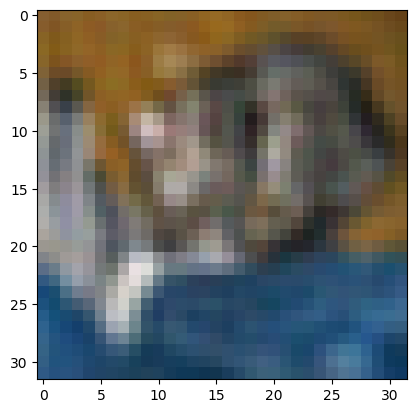

Predicted:  cat 
Groundtruth:  cat


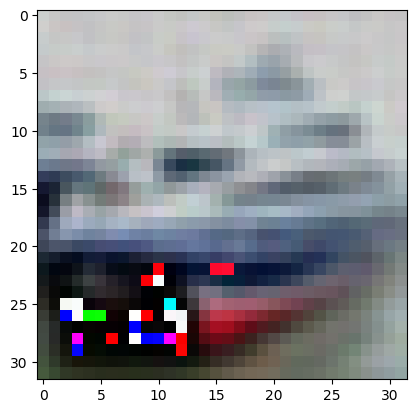

Predicted:  ship 
Groundtruth:  ship


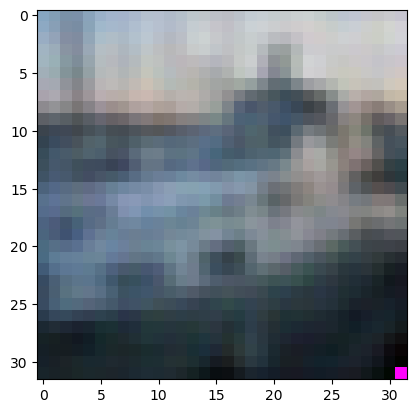

Predicted:  ship 
Groundtruth:  ship


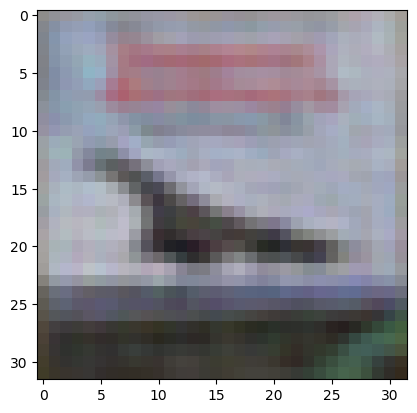

Predicted:  ship 
Groundtruth:  airplane


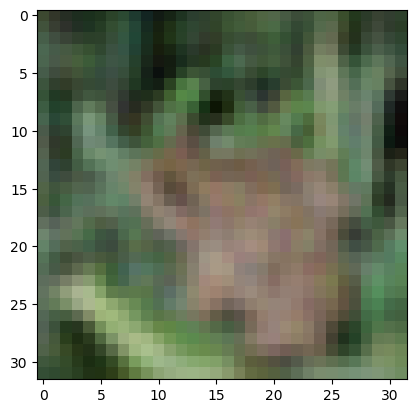

Predicted:  frog 
Groundtruth:  frog


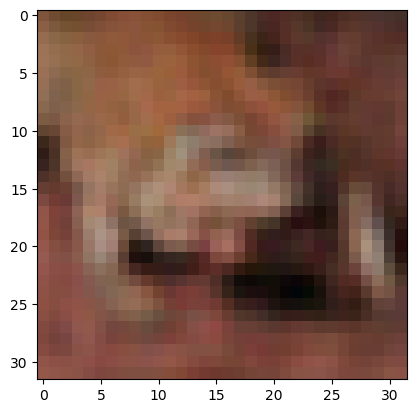

Predicted:  frog 
Groundtruth:  frog


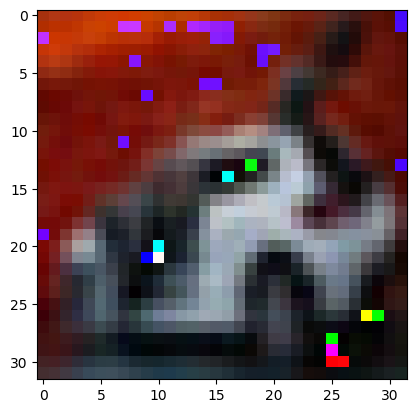

Predicted:  truck 
Groundtruth:  automobile


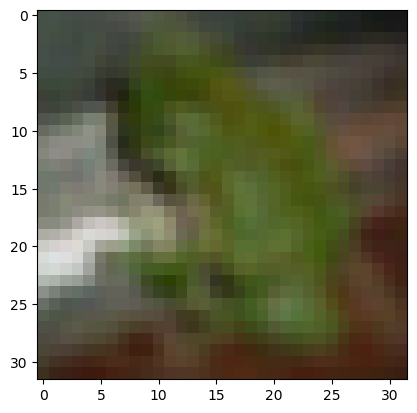

Predicted:  frog 
Groundtruth:  frog


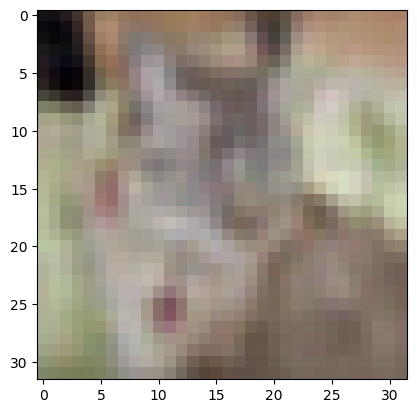

Predicted:  cat 
Groundtruth:  cat


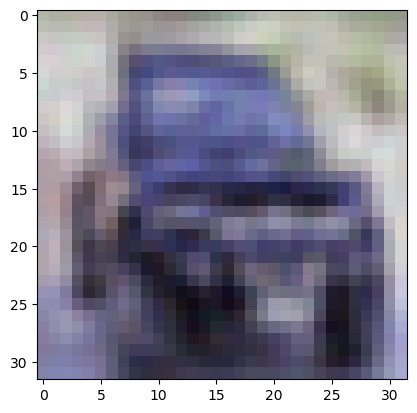

Predicted:  truck 
Groundtruth:  automobile


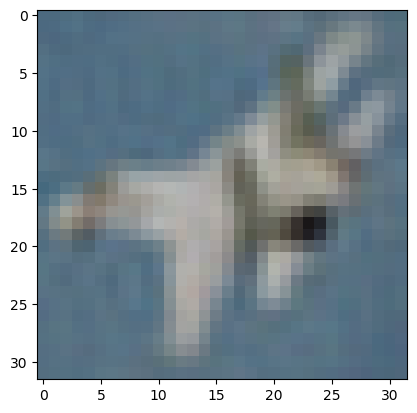

Predicted:  airplane 
Groundtruth:  airplane


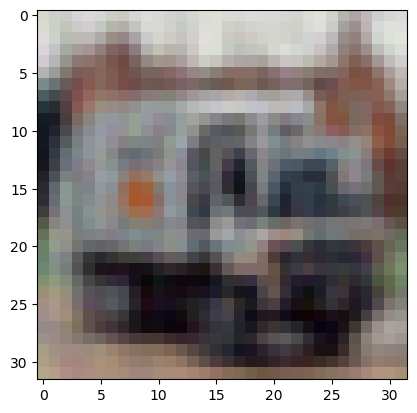

Predicted:  truck 
Groundtruth:  truck


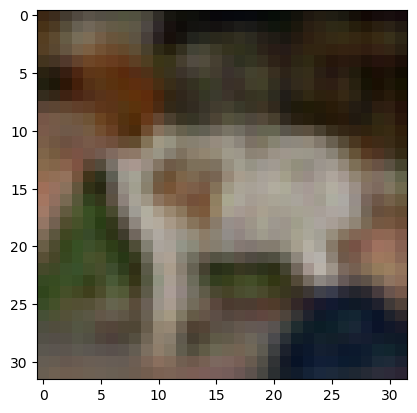

Predicted:  cat 
Groundtruth:  dog


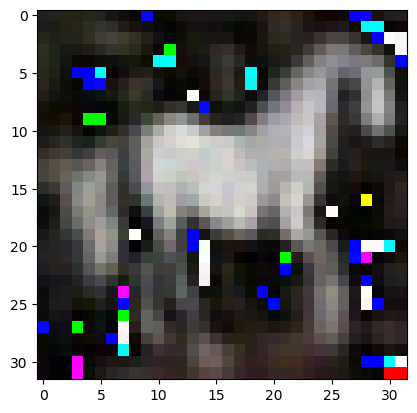

Predicted:  horse 
Groundtruth:  horse


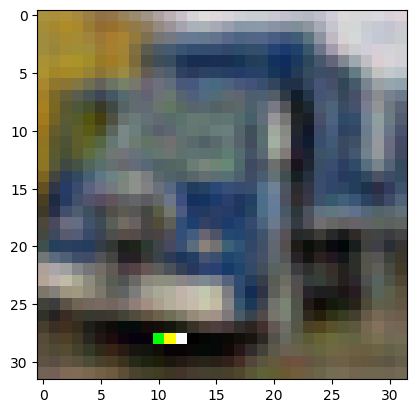

Predicted:  truck 
Groundtruth:  truck


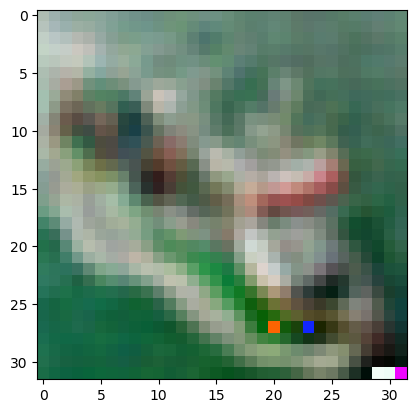

Predicted:  ship 
Groundtruth:  ship


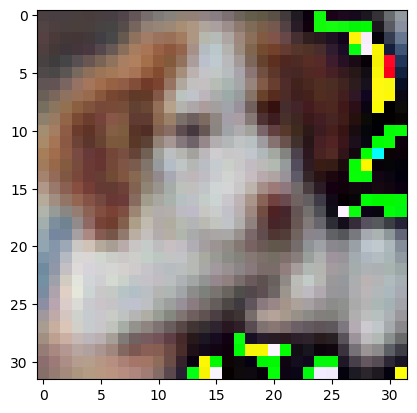

Predicted:  dog 
Groundtruth:  dog


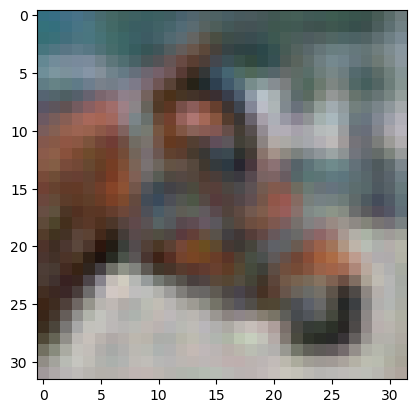

Predicted:  horse 
Groundtruth:  horse


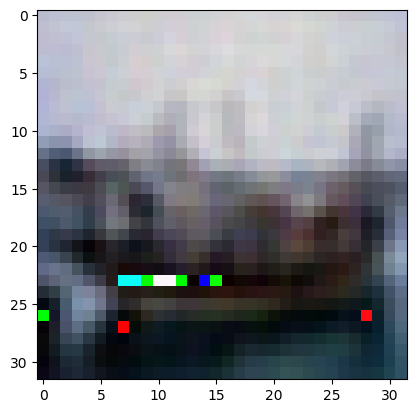

Predicted:  ship 
Groundtruth:  ship


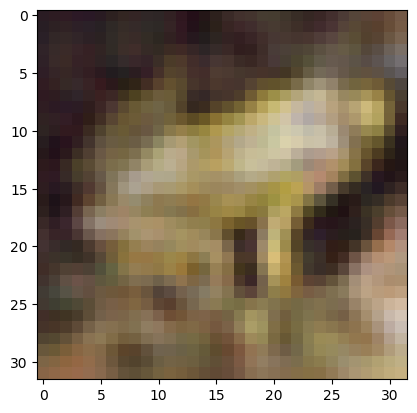

Predicted:  frog 
Groundtruth:  frog


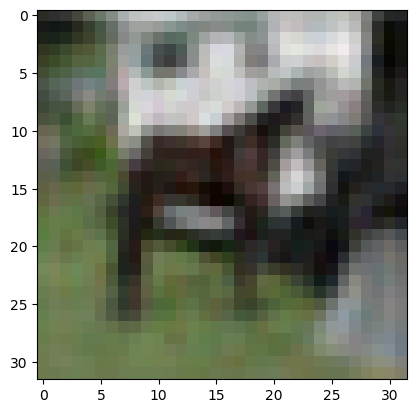

Predicted:  horse 
Groundtruth:  horse


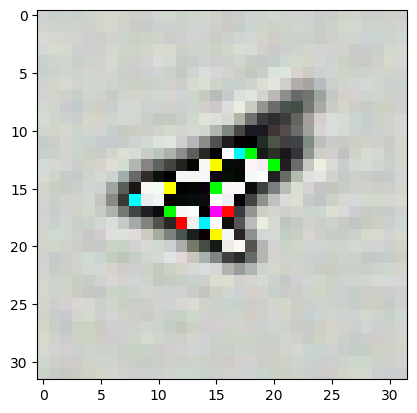

Predicted:  airplane 
Groundtruth:  airplane


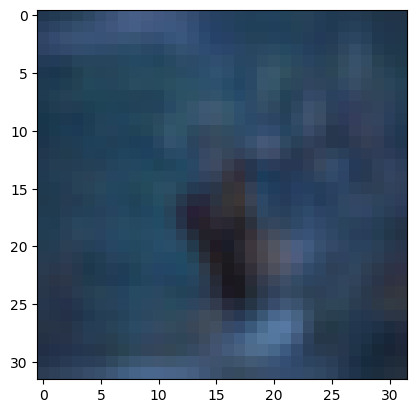

Predicted:  deer 
Groundtruth:  deer


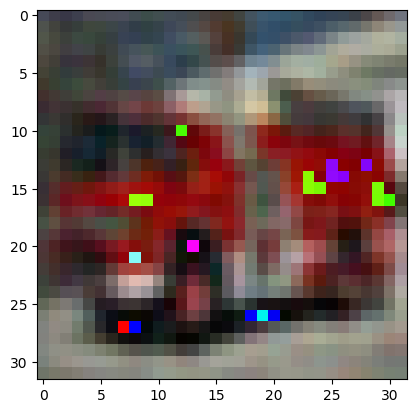

Predicted:  truck 
Groundtruth:  truck


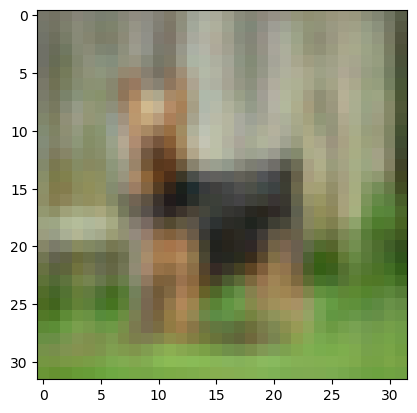

Predicted:  deer 
Groundtruth:  dog


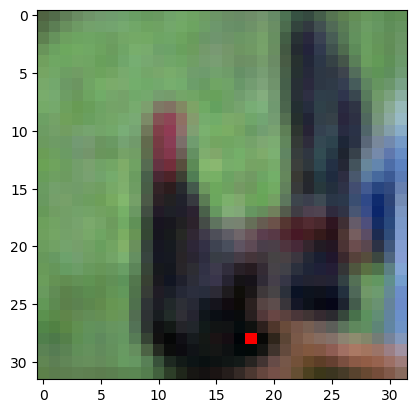

Predicted:  deer 
Groundtruth:  bird


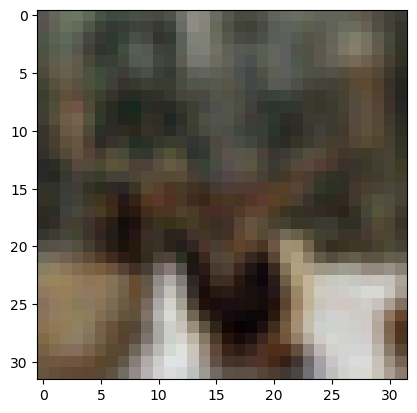

Predicted:  deer 
Groundtruth:  deer


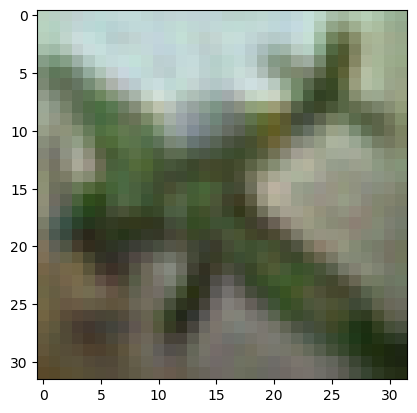

Predicted:  airplane 
Groundtruth:  airplane


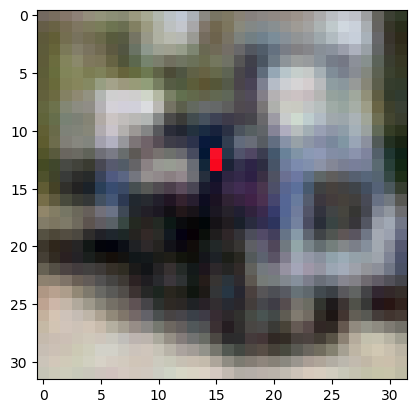

Predicted:  truck 
Groundtruth:  truck


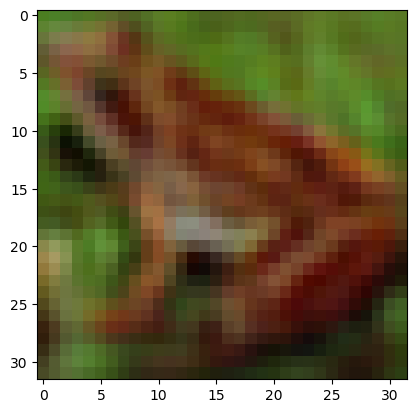

Predicted:  frog 
Groundtruth:  frog


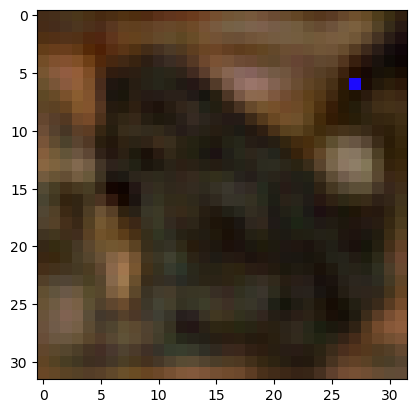

Predicted:  frog 
Groundtruth:  frog


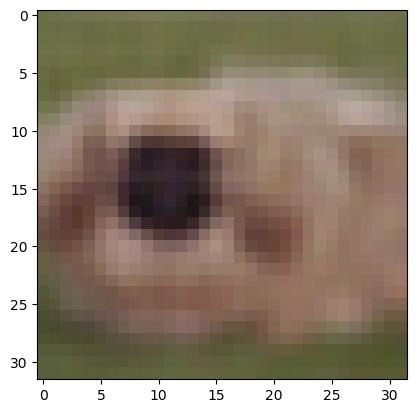

Predicted:  dog 
Groundtruth:  dog


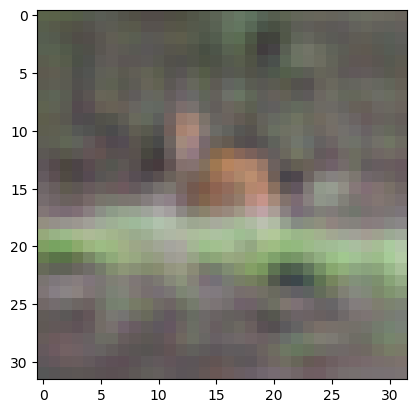

Predicted:  deer 
Groundtruth:  deer


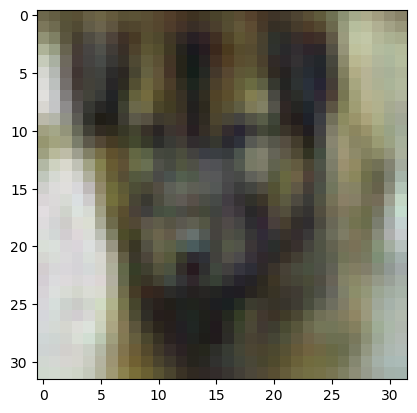

Predicted:  cat 
Groundtruth:  dog


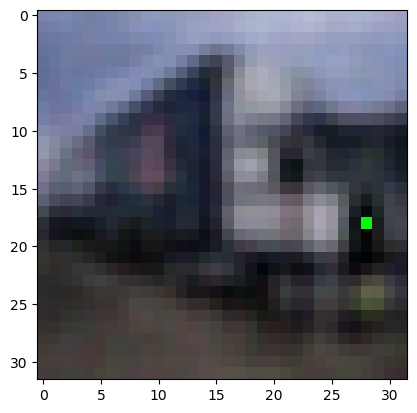

Predicted:  truck 
Groundtruth:  truck


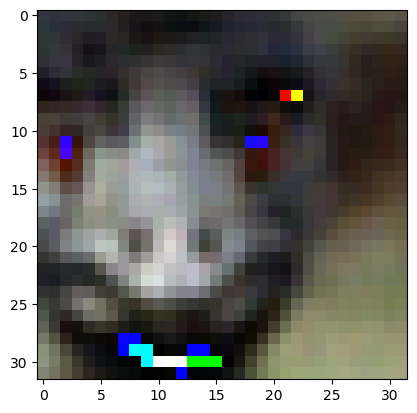

Predicted:  truck 
Groundtruth:  bird


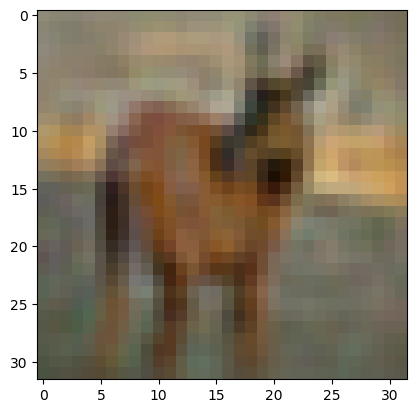

Predicted:  deer 
Groundtruth:  deer


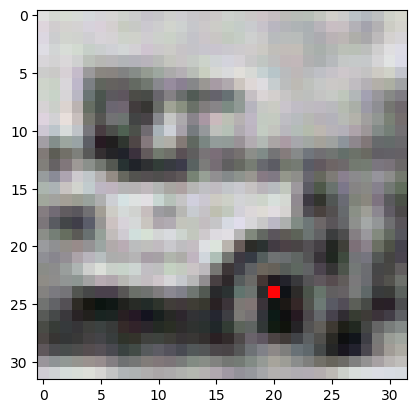

Predicted:  truck 
Groundtruth:  automobile


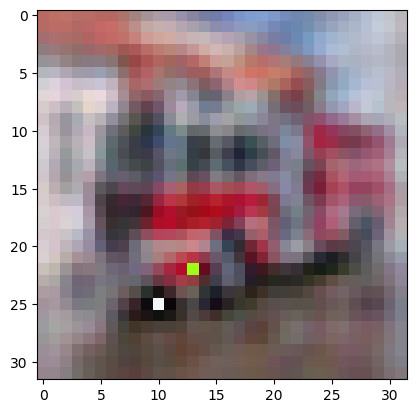

Predicted:  truck 
Groundtruth:  truck


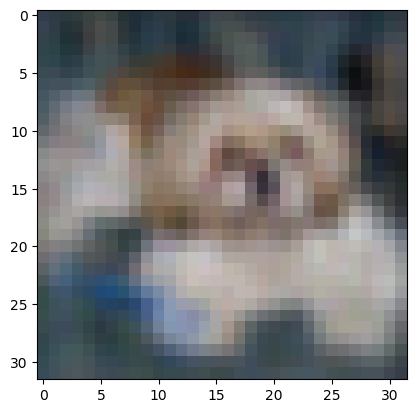

Predicted:  dog 
Groundtruth:  dog


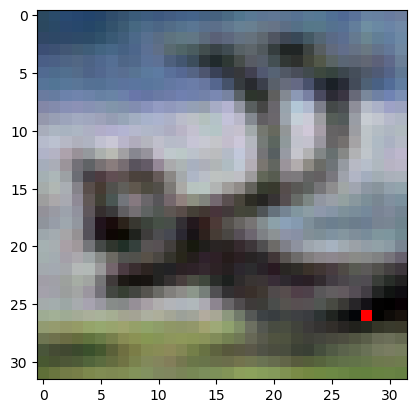

Predicted:  deer 
Groundtruth:  deer


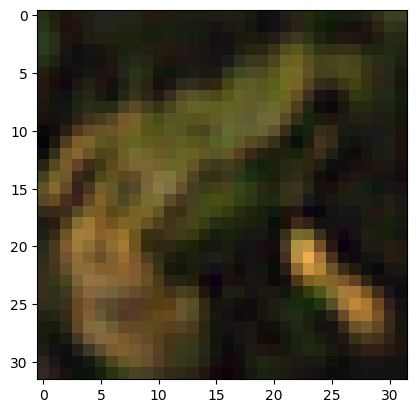

Predicted:  frog 
Groundtruth:  frog


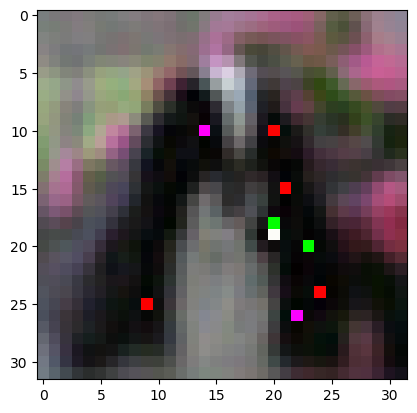

Predicted:  horse 
Groundtruth:  dog


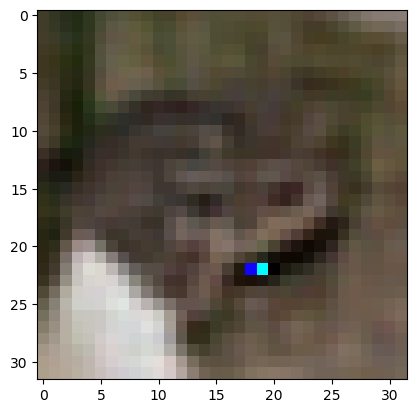

Predicted:  frog 
Groundtruth:  frog


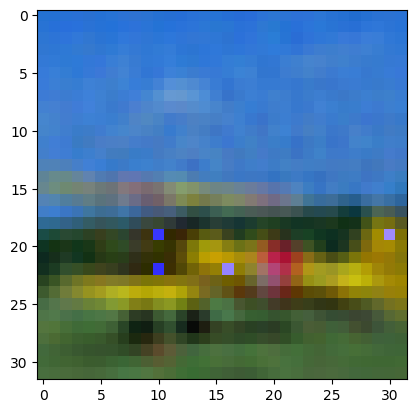

Predicted:  airplane 
Groundtruth:  airplane


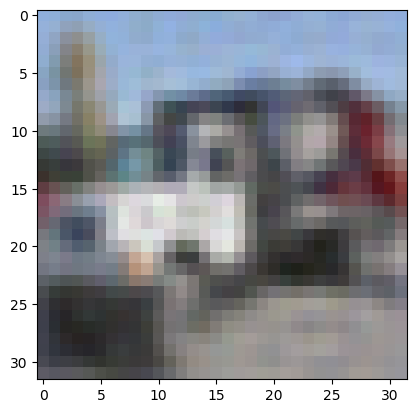

Predicted:  truck 
Groundtruth:  truck


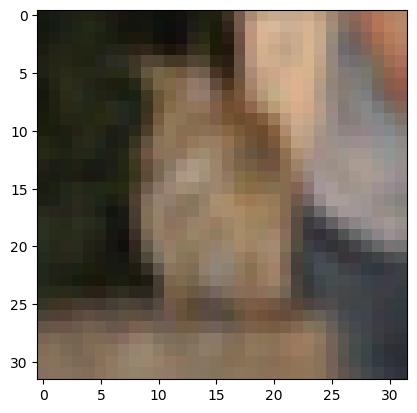

Predicted:  cat 
Groundtruth:  cat


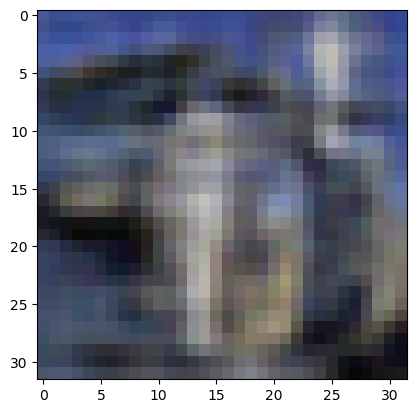

Predicted:  truck 
Groundtruth:  truck


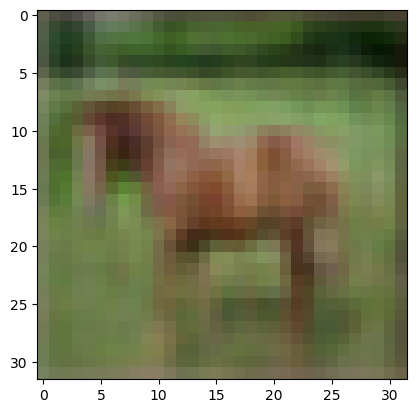

Predicted:  horse 
Groundtruth:  horse


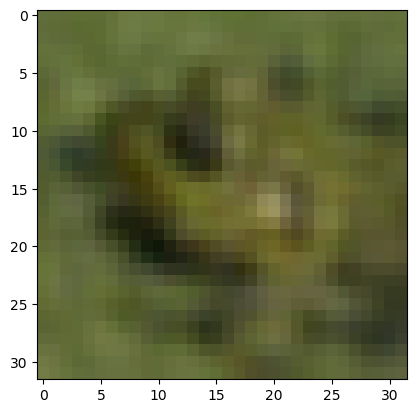

Predicted:  frog 
Groundtruth:  frog


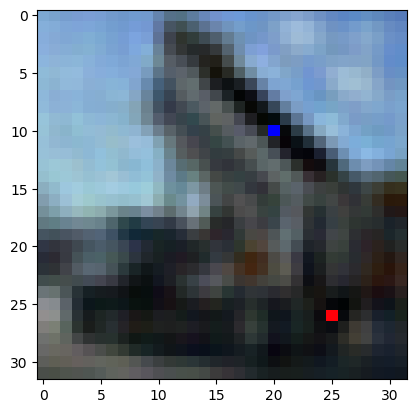

Predicted:  truck 
Groundtruth:  truck


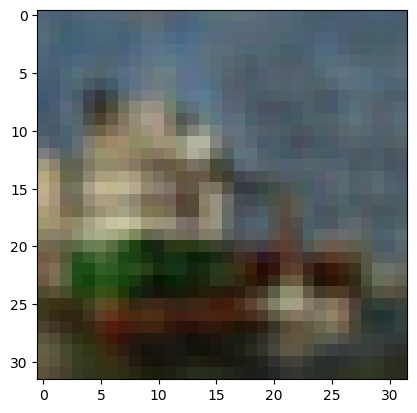

Predicted:  ship 
Groundtruth:  ship


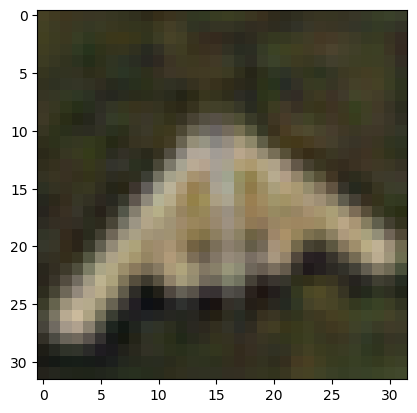

Predicted:  truck 
Groundtruth:  airplane


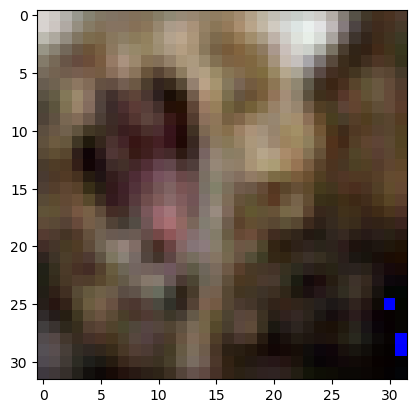

Predicted:  cat 
Groundtruth:  cat


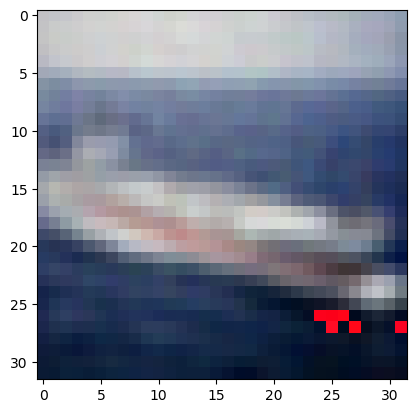

Predicted:  ship 
Groundtruth:  ship


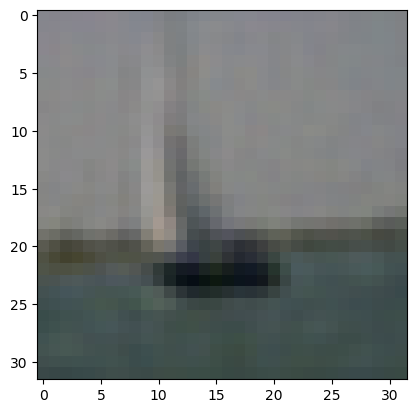

Predicted:  ship 
Groundtruth:  ship


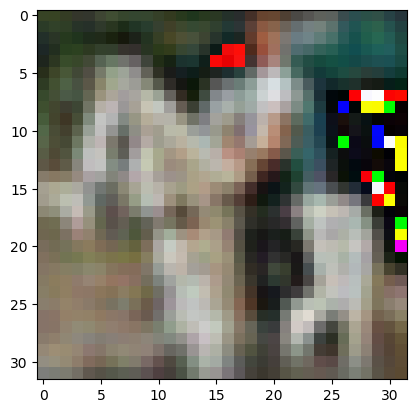

Predicted:  horse 
Groundtruth:  horse


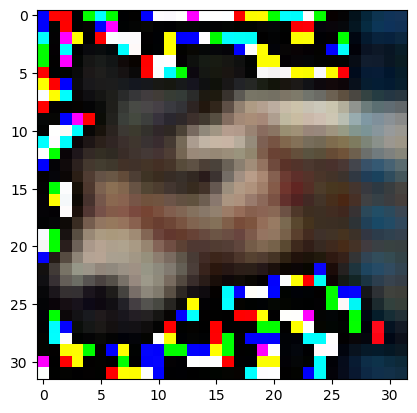

Predicted:  cat 
Groundtruth:  horse


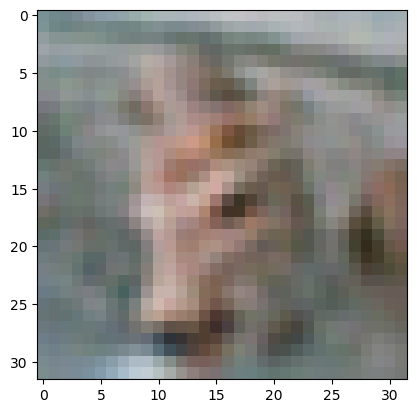

Predicted:  cat 
Groundtruth:  deer


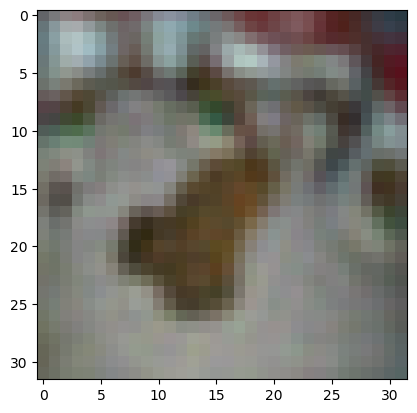

Predicted:  frog 
Groundtruth:  frog


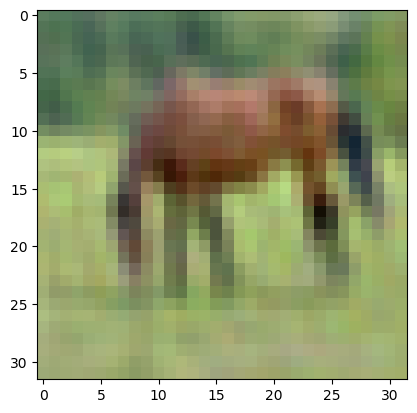

Predicted:  horse 
Groundtruth:  horse


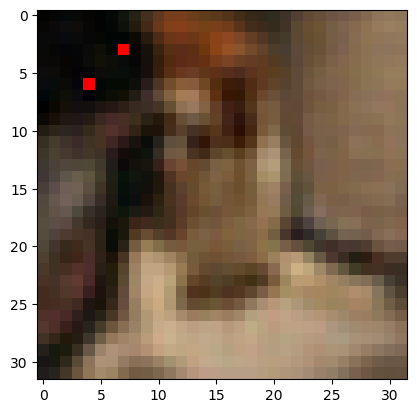

Predicted:  cat 
Groundtruth:  cat


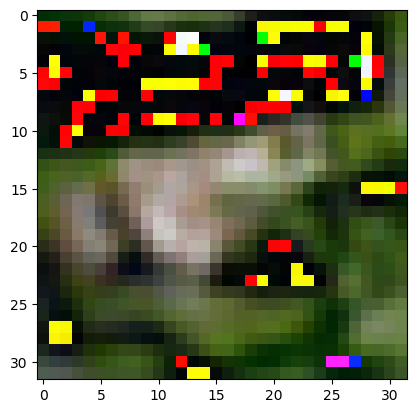

Predicted:  frog 
Groundtruth:  frog


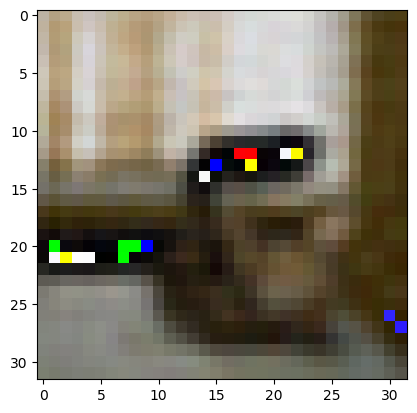

Predicted:  cat 
Groundtruth:  cat


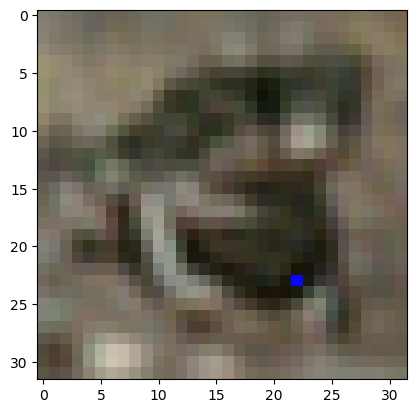

Predicted:  frog 
Groundtruth:  frog


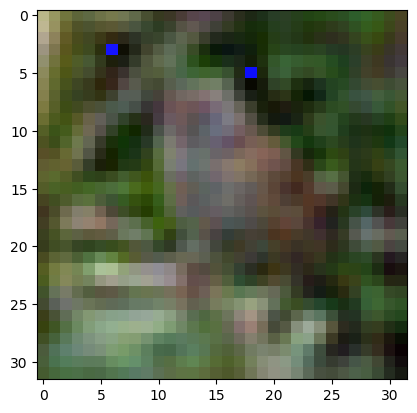

Predicted:  bird 
Groundtruth:  bird


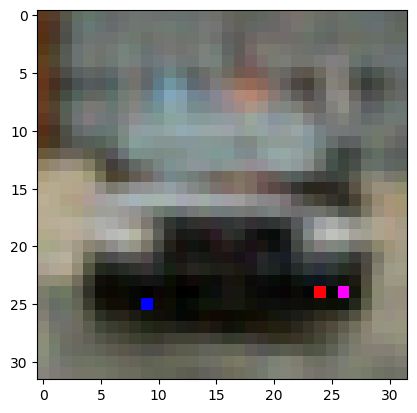

Predicted:  truck 
Groundtruth:  automobile


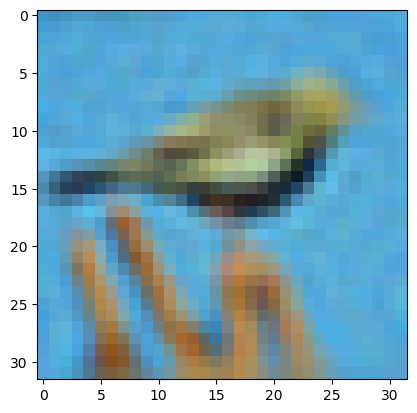

Predicted:  bird 
Groundtruth:  bird


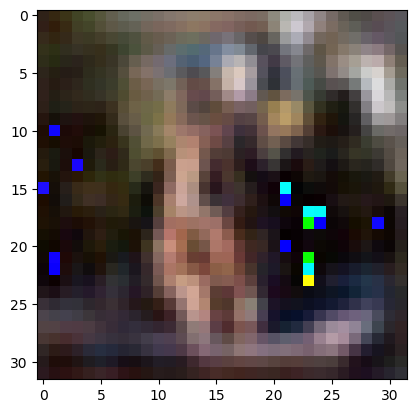

Predicted:  cat 
Groundtruth:  cat


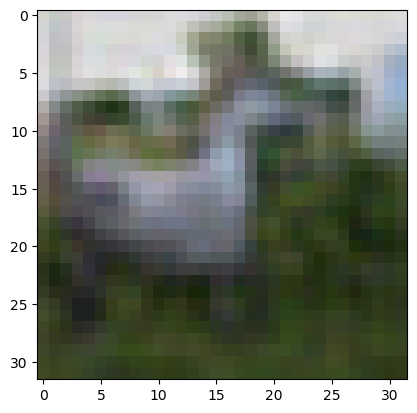

Predicted:  deer 
Groundtruth:  horse


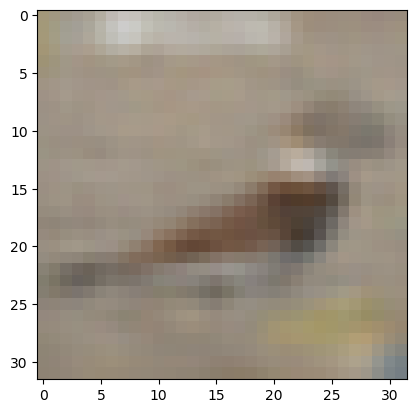

Predicted:  bird 
Groundtruth:  bird


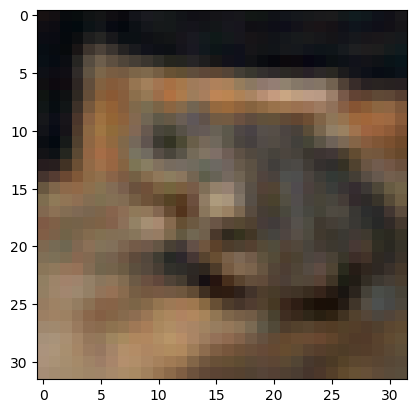

Predicted:  cat 
Groundtruth:  frog


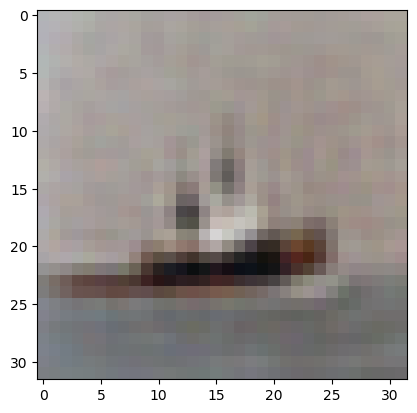

Predicted:  ship 
Groundtruth:  ship


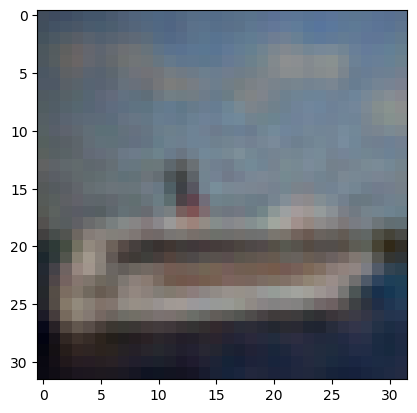

Predicted:  ship 
Groundtruth:  ship


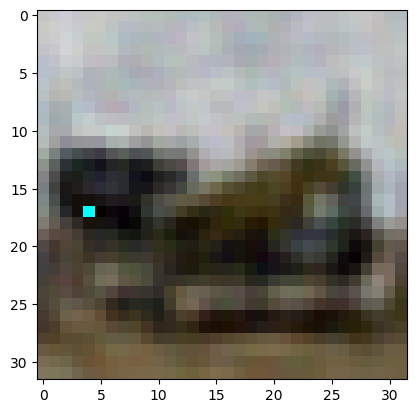

Predicted:  airplane 
Groundtruth:  airplane


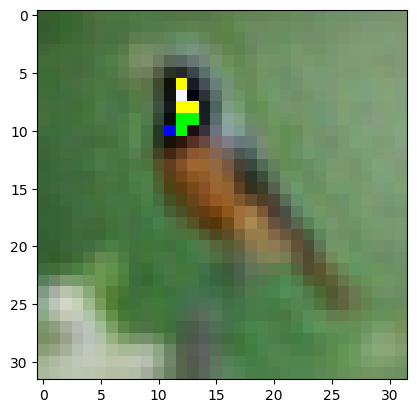

Predicted:  bird 
Groundtruth:  bird


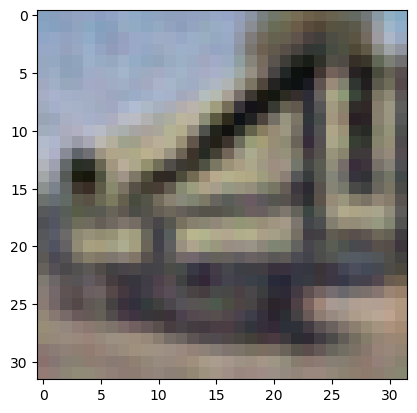

Predicted:  truck 
Groundtruth:  truck


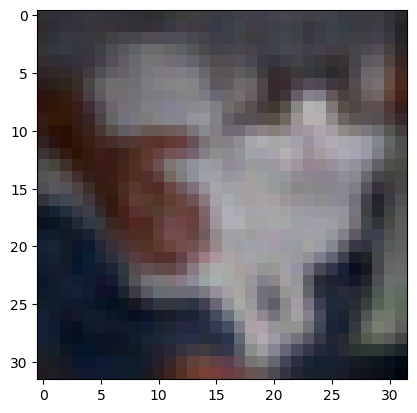

Predicted:  cat 
Groundtruth:  cat


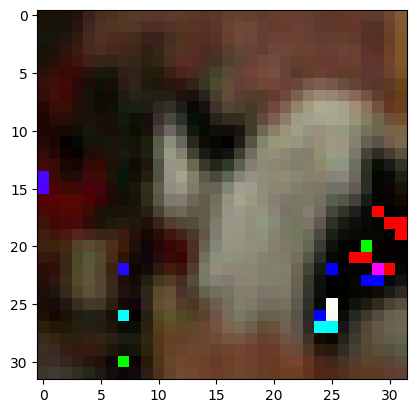

Predicted:  dog 
Groundtruth:  cat


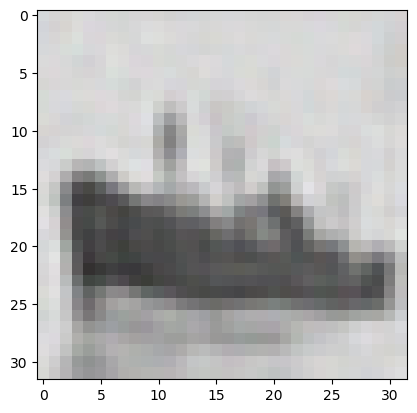

Predicted:  ship 
Groundtruth:  ship


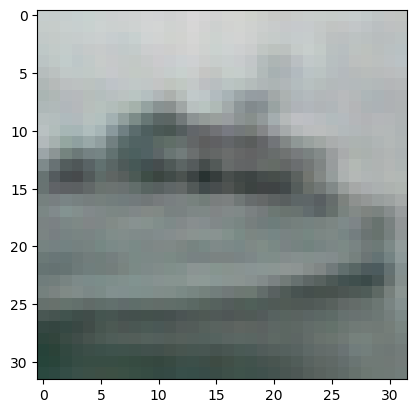

Predicted:  ship 
Groundtruth:  ship


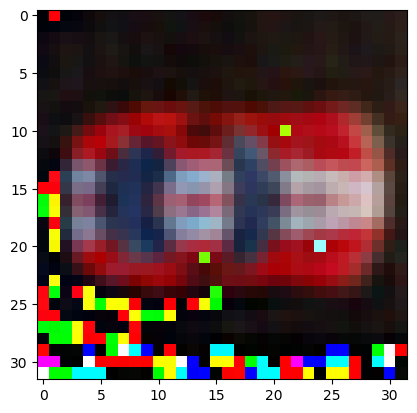

Predicted:  truck 
Groundtruth:  automobile


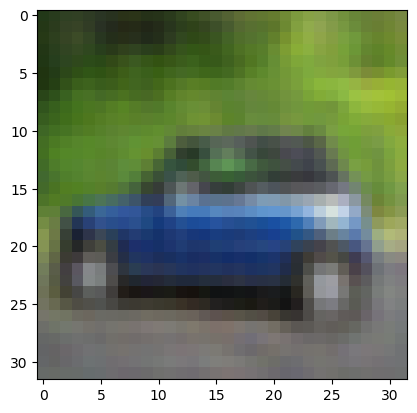

Predicted:  automobile 
Groundtruth:  automobile


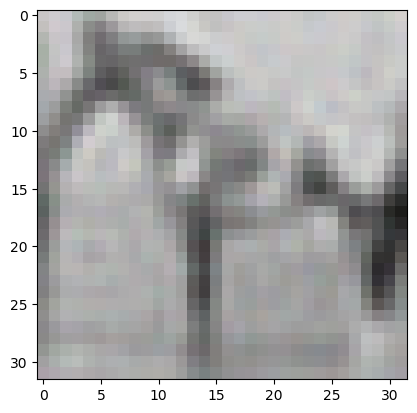

Predicted:  horse 
Groundtruth:  horse


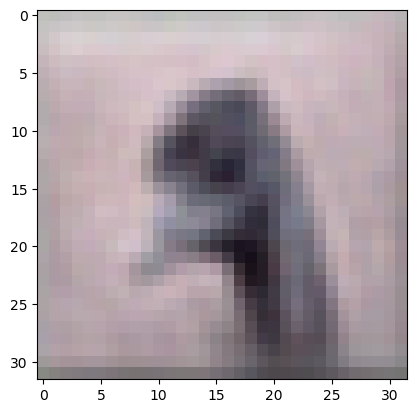

Predicted:  bird 
Groundtruth:  bird


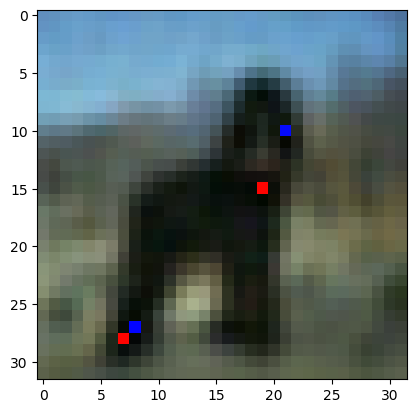

Predicted:  horse 
Groundtruth:  dog


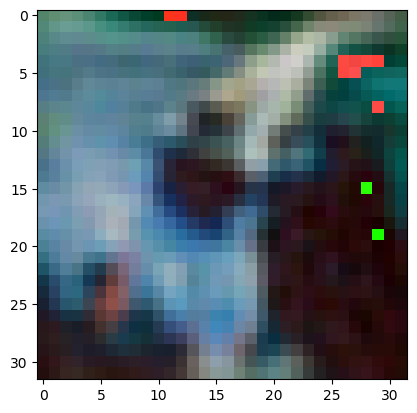

Predicted:  cat 
Groundtruth:  bird


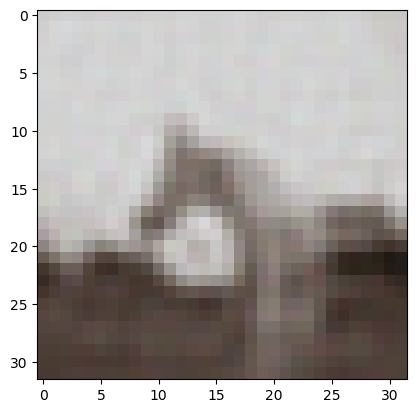

Predicted:  deer 
Groundtruth:  horse


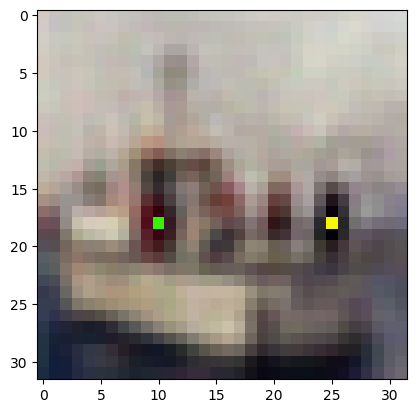

Predicted:  ship 
Groundtruth:  ship


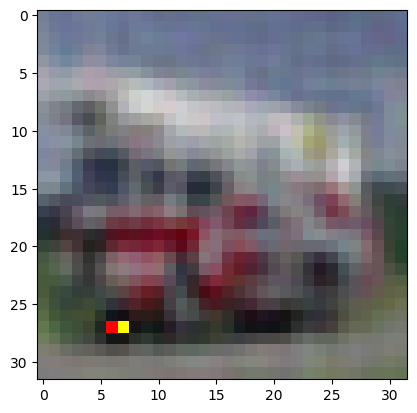

Predicted:  truck 
Groundtruth:  truck


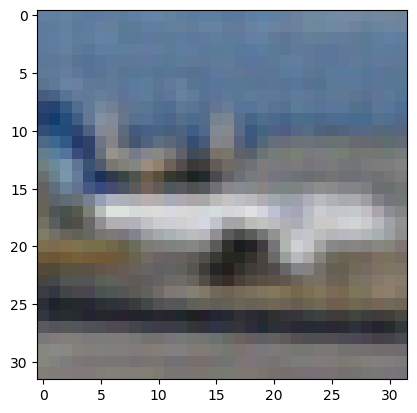

Predicted:  airplane 
Groundtruth:  airplane


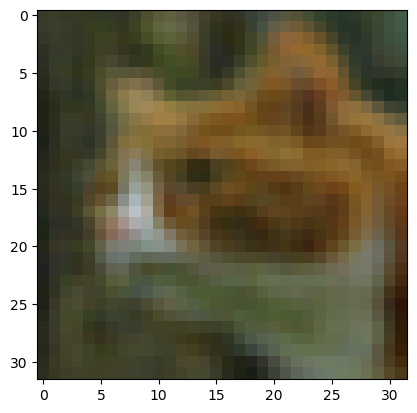

Predicted:  cat 
Groundtruth:  cat


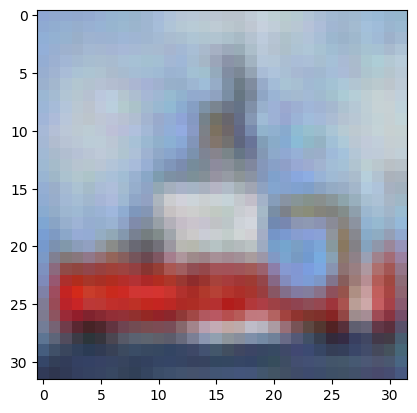

Predicted:  ship 
Groundtruth:  ship


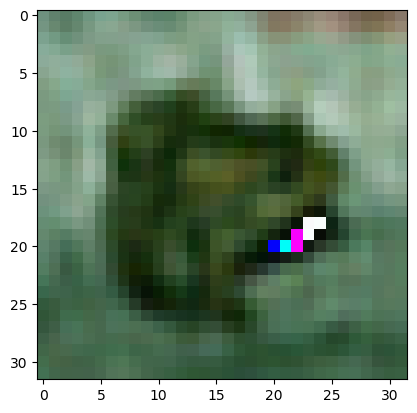

Predicted:  frog 
Groundtruth:  frog


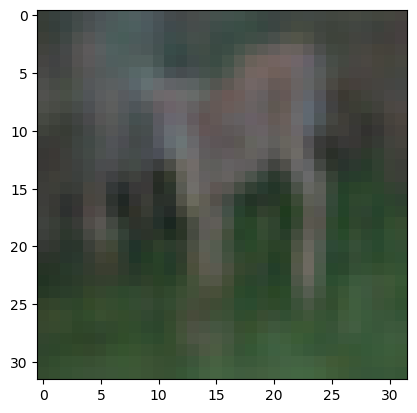

Predicted:  horse 
Groundtruth:  deer


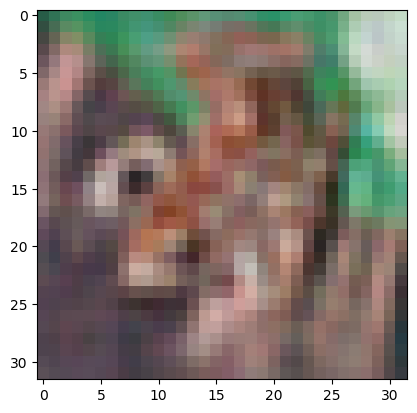

Predicted:  dog 
Groundtruth:  frog


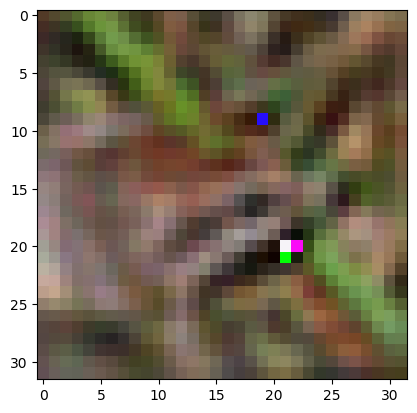

Predicted:  frog 
Groundtruth:  frog


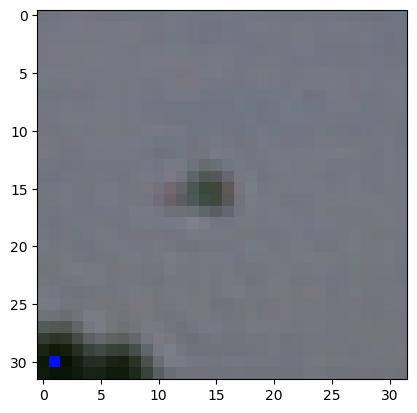

Predicted:  airplane 
Groundtruth:  airplane


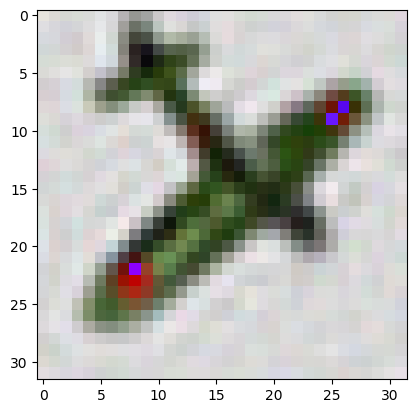

Predicted:  airplane 
Groundtruth:  airplane


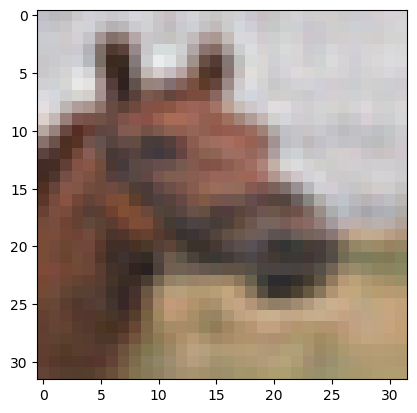

Predicted:  horse 
Groundtruth:  horse


In [10]:
import matplotlib.pyplot as plt
import numpy as np

label_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

model.eval()
ratio = 300/255
for i in range(10):
    img = test_data.__getitem__(i)[0]
    img = img[None, :,:,:]
    prediction = model(img)
    predicted_classification = label_map[prediction.argmax().numpy().item()]
    label = test_data.__getitem__(i)[1]
    true_classification = label_map[test_data.__getitem__(i)[1]]
    plt.imshow(((test_data.__getitem__(i)[0].permute(1,2,0).numpy())/ratio).astype('uint8'), cmap=plt.cm.bone, interpolation='nearest')
    plt.show()
    print("Predicted: ", predicted_classification, "\nGroundtruth: ", true_classification)

In [38]:
# visualize all failed predictions
import matplotlib.pyplot as plt
counter = 0
for i in range(100):
    # get prediction
    prediction = model(test_data[i][0].unsqueeze(0))
    # get label
    label = test_data[i][1]
    # print prediction and label
    if prediction.argmax() != label:
        # show image
        print("Model's prediction: " + str(prediction.argmax().numpy()), "True label: " +  str(label))
        counter+=1
print("Number of failed predictions: " + str(counter) + " / 100")

Model's prediction: 8 True label: 0
Model's prediction: 3 True label: 5
Model's prediction: 6 True label: 8
Model's prediction: 4 True label: 5
Model's prediction: 3 True label: 2
Model's prediction: 3 True label: 5
Model's prediction: 3 True label: 2
Model's prediction: 9 True label: 1
Model's prediction: 7 True label: 5
Model's prediction: 8 True label: 0
Model's prediction: 8 True label: 9
Model's prediction: 4 True label: 7
Model's prediction: 3 True label: 7
Model's prediction: 3 True label: 4
Model's prediction: 5 True label: 3
Model's prediction: 8 True label: 1
Model's prediction: 4 True label: 7
Model's prediction: 5 True label: 3
Model's prediction: 4 True label: 2
Model's prediction: 0 True label: 7
Number of failed predictions: 20 / 100


In [39]:
ground_truth = []
predictions = []

for i in range(len(test_data)):
    # get prediction
    img = test_data.__getitem__(i)[0]
    img = img[None, :,:,:]
    prediction = model(img)
    # get label
    label = test_data.__getitem__(i)[1]
    # print prediction and label
    ground_truth.append(label)
    predictions.append(prediction.argmax().numpy())


In [40]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(ground_truth, predictions))

# Print the precision and recall, among other metrics
print(metrics.classification_report(ground_truth, predictions, digits=2))

[[840   7  27   6  13   0   7   4  79  17]
 [ 13 920   1   1   2   0   3   0  26  34]
 [ 25   1 800  33  77   3  37  10  11   3]
 [ 10   2  38 775  54  35  40  23  16   7]
 [  2   1  18  18 929   1  11  13   6   1]
 [  8   1  33 255  56 591   9  43   3   1]
 [  4   0  15  34  15   3 927   1   0   1]
 [ 16   1  12  19 100   5   7 830   5   5]
 [ 27   5   1   2   0   0   3   0 956   6]
 [ 19  57   1   6   2   0   0   1  36 878]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.92      0.92      0.92      1000
           2       0.85      0.80      0.82      1000
           3       0.67      0.78      0.72      1000
           4       0.74      0.93      0.83      1000
           5       0.93      0.59      0.72      1000
           6       0.89      0.93      0.91      1000
           7       0.90      0.83      0.86      1000
           8       0.84      0.96      0.89      1000
           9       0.92     